## Test of the processing pipeline that will take place for every metric
> This file's purpose is to **test** the new approach we will be using to complete the project.

## Generative question:
- How does investment criteria affect the returns of a portfolio?

### Hypothesis:
- Some metrics or percentiles of them will yield portfolios with higher returns than the SP500 consistently over time.

### Steps:
1. [Load data for a single metric](#step-1)
2. [Limit span of data from 2000Q1 to 2023Q2](#step-2)
3. [Plot distribution of data. We need to make sure data was fetched correctly](#step-3)
4. [Clean data if needed (outliers, missing values, etc. Maybe calculate No. of missing values, etc.)](#step-4)
5. [Save cleaned data (.pickle)](#step-5)
6. [Select study and investment periods](#step-6)
7. [Calculate average of metric per company](#step-7)
8. [Calculate central tendency and dispersion measures for the averages](#step-8)
9. [Create portfolios of companies based percentiles on the average (or median) of metric](#step-9)
10. [Calculate returns of portfolios and SP500](#step-10)
11. [Compute the difference in returns between portfolios and SP500](#step-11)
12. [Test for statistical significance of the difference in returns](#step-12)
13. [Evaluate risk of portfolios (Maybe classify them based on sortino and sharpe ratios)](#step-13)
14. [Evaluate the sensitivity of methodology to changes in the study and investment periods](#step-14)

In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Add cwd/.. to path so the imports to my user defined packages work
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..'))
from src.data_fetchers.metrics_fetcher import MetricsFetcher
from src.data_fetchers.classification_fetcher import ClassificationFetcher
from src.data_fetchers.returns_fetcher import ReturnsFetcher
from src.configs.file_style_configs_by_metric import file_style_configs_by_metric


### Step 1
[Steps backlink](#steps)

In [75]:
data_path = os.path.join("..", "data", "companies_data")
fetcher = MetricsFetcher(data_path, file_style_configs_by_metric)

name_of_metric = "Pretax ROE"
ROA_df = fetcher.fetch(name_of_metric, os.path.join("..", "data", "pickled_data"))

def change_df_index_to_period(df: pd.DataFrame):
    df.index = pd.to_datetime(df.index)
    df.index = df.index.to_period("Q")

change_df_index_to_period(ROA_df)

ROA_df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 141 entries, 1989Q2 to 2024Q2
Freq: Q-DEC
Columns: 251 entries, AAPL to ZION
dtypes: float64(215), object(36)
memory usage: 277.6+ KB


We have data from 2023Q2-2024Q4, we think these are forecasted values. They only appear for a small subset of companies.

### Step 2
[Steps backlink](#steps)

In [76]:
def select_range_of_data(df: pd.DataFrame, period_start: pd.Period, period_end: pd.Period) -> pd.DataFrame:
    return df[period_start:period_end]

ROA_df = select_range_of_data(ROA_df, pd.Period("2000Q1"), pd.Period("2023Q2"))
print(min(ROA_df.index), max(ROA_df.index))

2000Q1 2023Q2


### Step 3
[Steps backlink](#steps)

Before plotting the distribution of the data and checking for outliers, we need to make sure we are working with complete data.
So, will explore it there are missing values

In [77]:
print("Number of NaNs: ", ROA_df.isna().sum().sum())

hyphen_count = (ROA_df.map(lambda x: isinstance(x, str) and '-' in x)).sum().sum()
print("Number of hypens: ", hyphen_count)

non_float_count = (ROA_df.map(lambda x: not isinstance(x, (float, np.floating)))).sum().sum()
print("Number of non floats: ", not_float_count)

# Let's change hyphens for NaNs
ROA_df = ROA_df.replace('-', np.nan)

hyphen_count = (ROA_df.map(lambda x: isinstance(x, str) and '-' in x)).sum().sum()
print("Number of hypens after replacing with NaNs: ", hyphen_count)

# TODO: Figure out what to do with missing values in the time series.
# I find this tricky as some companies are missing their values for long periods of time. For 1 or 2 missing values it's piece of cake.

Number of NaNs:  95
Number of hypens:  422
Number of non floats:  429
Number of hypens after replacing with NaNs:  0


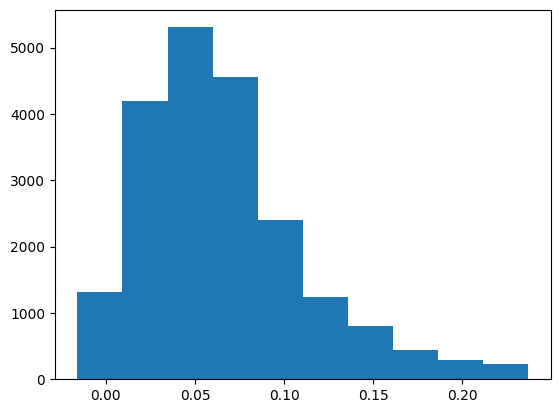

In [80]:
df_stack = ROA_df.stack() # "Flatten" the DataFrame

df_stack_no_outliers = df_stack[df_stack.between(df_stack.quantile(0.05), df_stack.quantile(0.95))]
plt.hist(df_stack_no_outliers)
plt.show()

In [79]:
)

SyntaxError: unmatched ')' (687023194.py, line 1)

### Step 4
[Steps backlink](#steps)

### Step 5
[Steps backlink](#steps)

### Step 6
[Steps backlink](#steps)

### Step 7
[Steps backlink](#steps)

### Step 8
[Steps backlink](#steps)

### Step 9
[Steps backlink](#steps)

### Step 10
[Steps backlink](#steps)

### Step 11
[Steps backlink](#steps)

### Step 12
[Steps backlink](#steps)

### Step 13
[Steps backlink](#steps)

### Step 14
[Steps backlink](#steps)